In [ ]:
import pandas as pd

# Load the dataset, using on_bad_lines to handle problematic rows
file_path = 'updated_dataset.csv'  # Update with the actual file path
try:
    df = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip')
    print("CSV file loaded successfully.")
except Exception as e:
    print(f"Error loading CSV file: {e}")


CSV file loaded successfully.



Summary statistics for numerical features:
               year       ratings   Price (USD)
count  44423.000000  44424.000000  44424.000000
mean    2012.806497      3.603818     36.133847
std        2.126480      1.278544     16.741335
min     2007.000000      1.000000     10.000000
25%     2011.000000      3.000000     26.000000
50%     2012.000000      4.000000     34.000000
75%     2015.000000      5.000000     43.000000
max     2019.000000      5.000000    150.000000


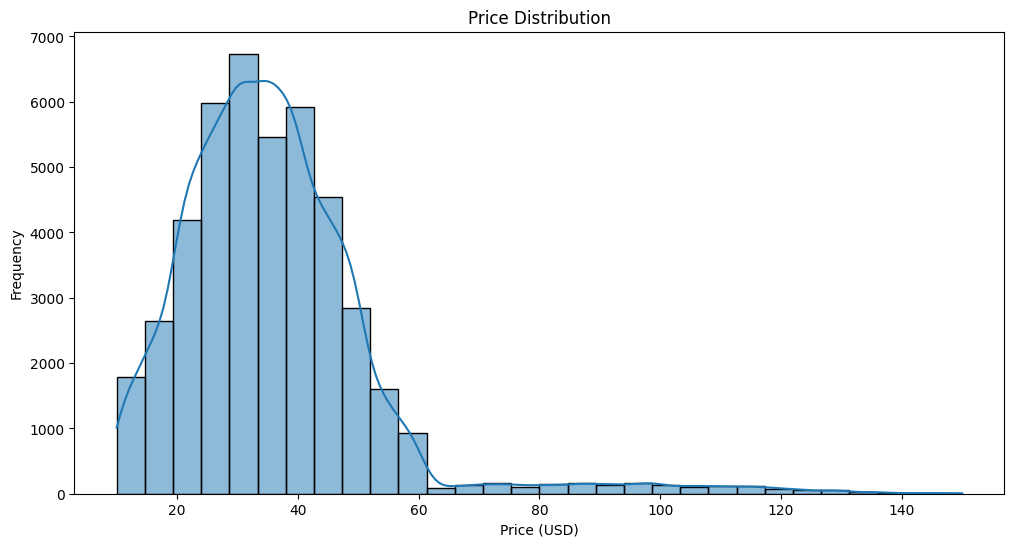

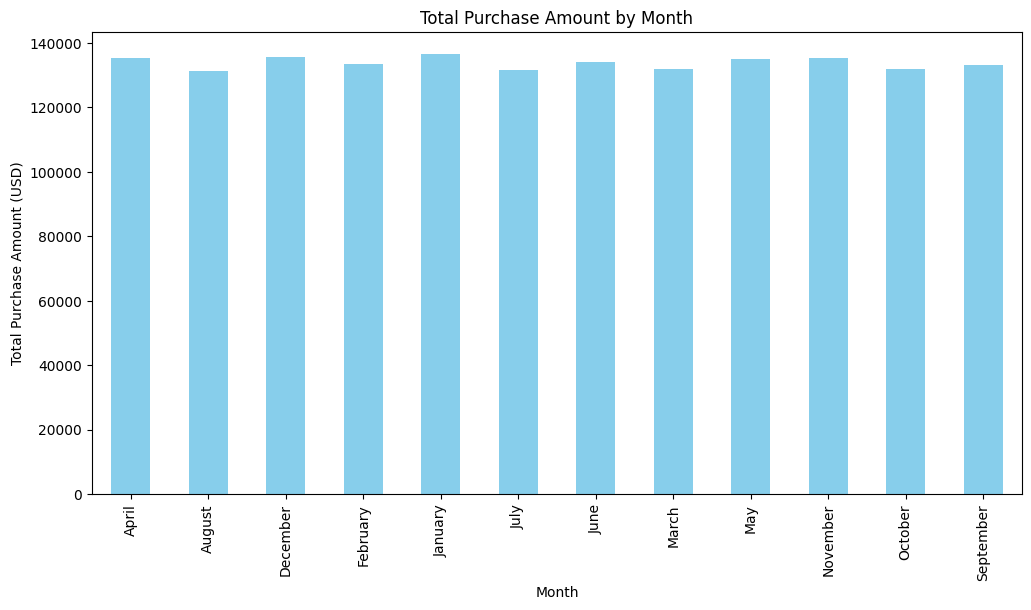

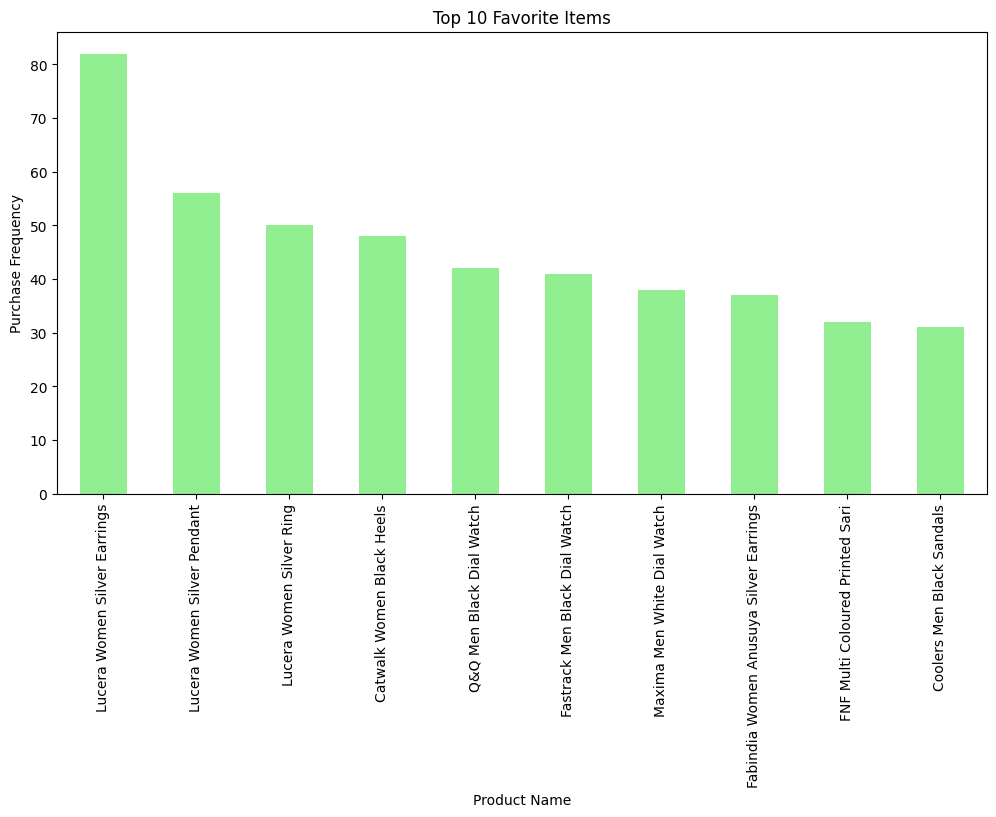

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistical summary
print("\nSummary statistics for numerical features:")
print(df.describe())

# Distribution of numerical features (e.g., Price)
plt.figure(figsize=(12, 6))
sns.histplot(df['Price (USD)'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

# Purchase trends by month
monthly_trends = df.groupby('Month')['Price (USD)'].sum().sort_index()
plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='bar', color='skyblue')
plt.title('Total Purchase Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

# Favorite items (top 10 most frequently purchased products)
top_items = df['productDisplayName'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_items.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Favorite Items')
plt.xlabel('Product Name')
plt.ylabel('Purchase Frequency')
plt.show()

<ipython-input-29-ed220f3865d1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='masterCategory', palette='Set3')


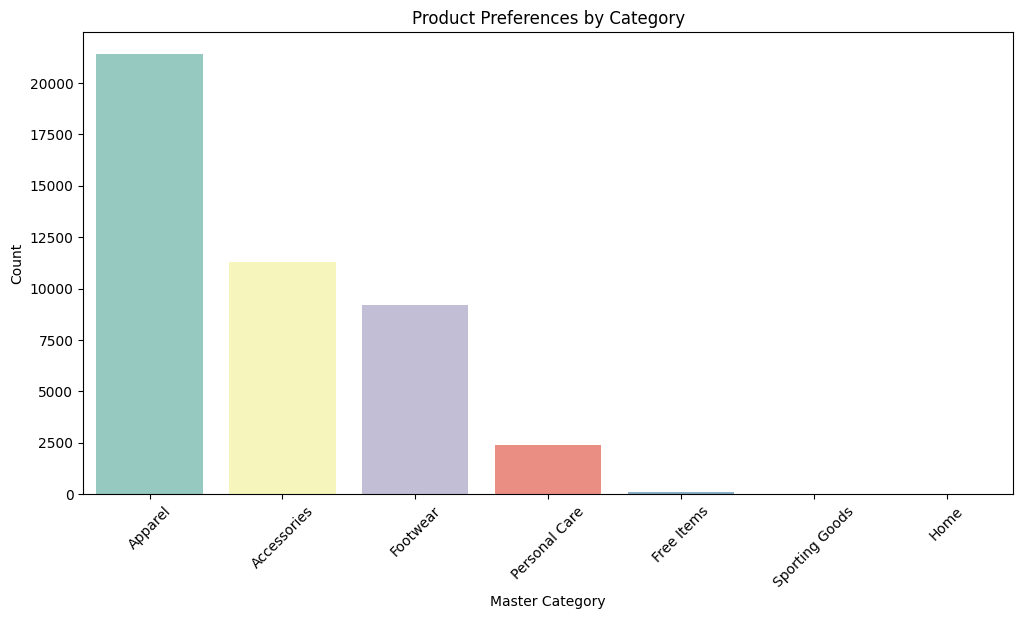

<ipython-input-29-ed220f3865d1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='baseColour', order=df['baseColour'].value_counts().index, palette='Set2')


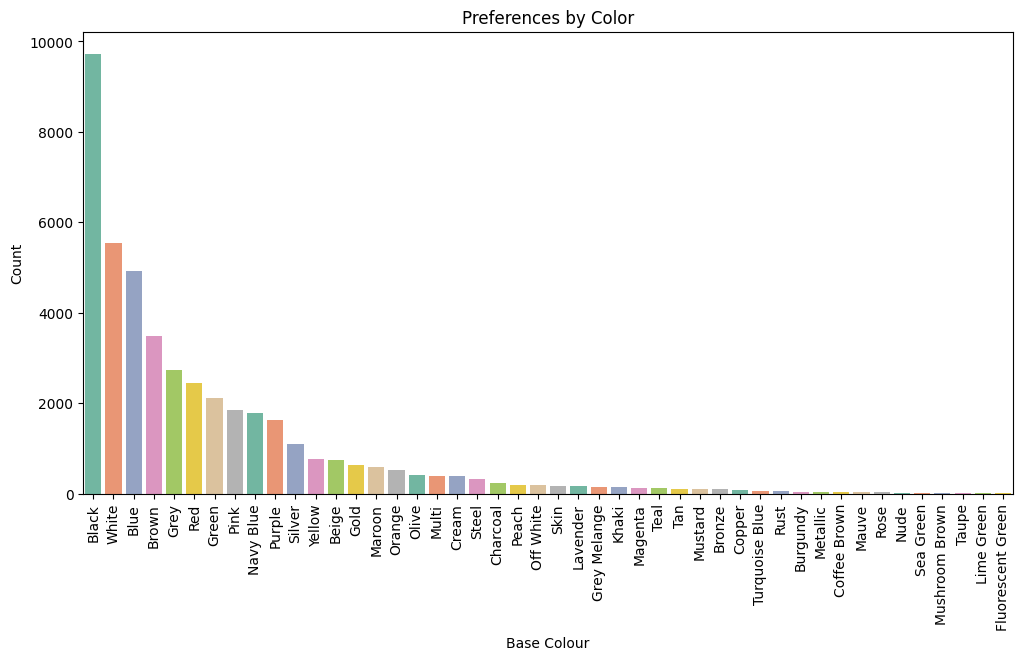

<ipython-input-29-ed220f3865d1>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='coolwarm')


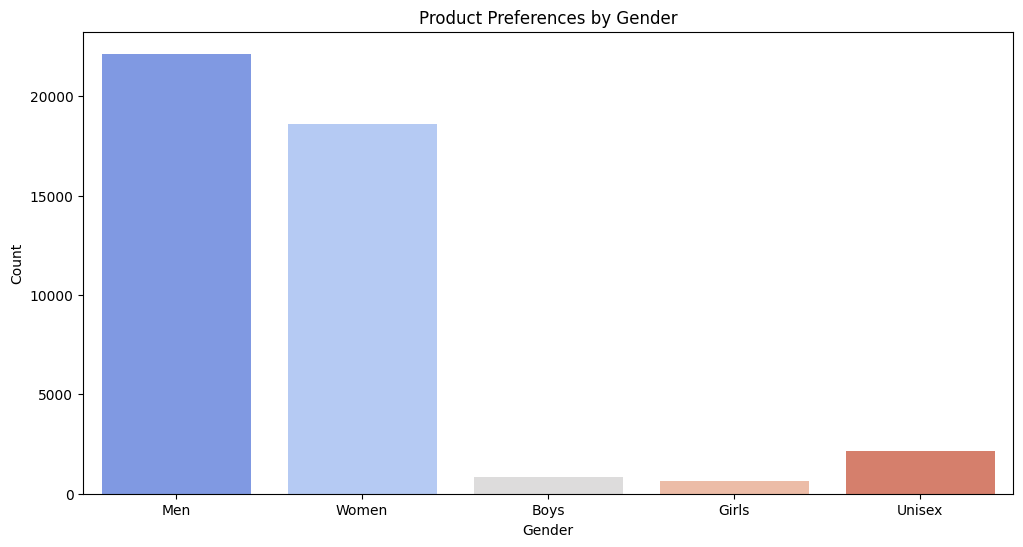

In [ ]:
# Product preferences by masterCategory
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='masterCategory', palette='Set3')
plt.title('Product Preferences by Category')
plt.xlabel('Master Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Preferences by color
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='baseColour', order=df['baseColour'].value_counts().index, palette='Set2')
plt.title('Preferences by Color')
plt.xlabel('Base Colour')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Segment analysis by gender
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='gender', palette='coolwarm')
plt.title('Product Preferences by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

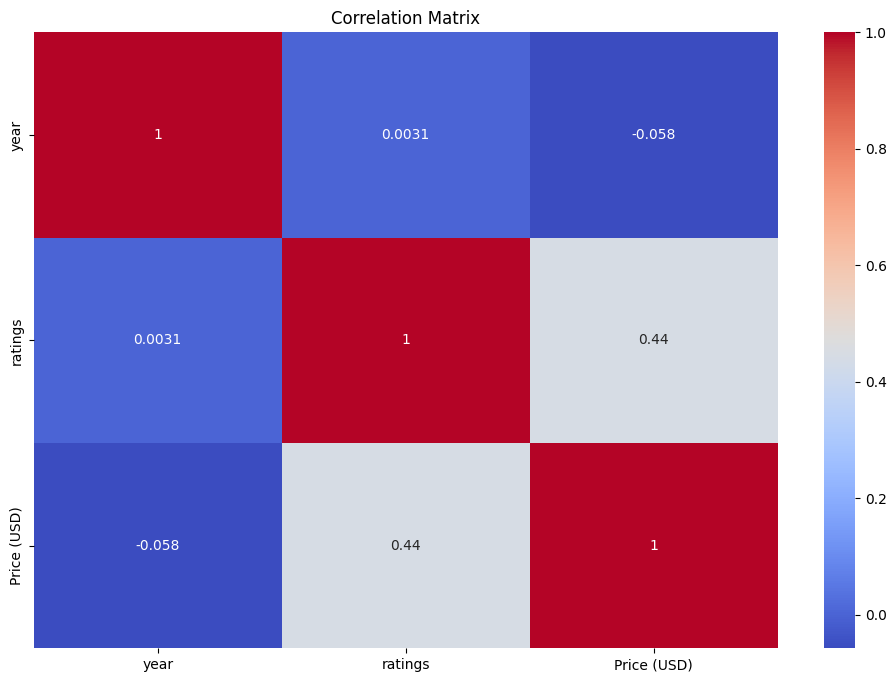

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation analysis
plt.figure(figsize=(12, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Display the list of columns in the DataFrame
print("Columns in the dataset:")
print(df.columns)

# Check for missing values in the actual columns
print("\nMissing values in each column:")
print(df.isnull().sum())


Columns in the dataset:
Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName',
       'filename', 'link', 'ratings', 'review', 'Month', 'Price (USD)'],
      dtype='object')

Missing values in each column:
id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
filename                0
link                    0
ratings                 0
review                  0
Month                   0
Price (USD)             0
dtype: int64


In [ ]:
# Display the list of columns in the DataFrame
print("Columns in the dataset:")
print(df.columns)

# Check for missing values in the actual columns
print("\nMissing values in each column:")
print(df.isnull().sum())
# Fill missing values for 'baseColour' with the most frequent value
df.loc[:, 'baseColour'] = df['baseColour'].fillna(df['baseColour'].mode()[0])

# Fill missing values for 'season' with the most frequent value
df.loc[:, 'season'] = df['season'].fillna(df['season'].mode()[0])

# Fill missing value for 'year' with the median value (since it's a numerical field)
df.loc[:, 'year'] = df['year'].fillna(df['year'].median())

# Fill missing values for 'usage' with 'Not Specified'
df.loc[:, 'usage'] = df['usage'].fillna('Not Specified')

# Fill missing values for 'productDisplayName' with 'Unknown'
df.loc[:, 'productDisplayName'] = df['productDisplayName'].fillna('Unknown')

# Verify that all missing values have been handled
print("\nMissing values after filling:")
print(df.isnull().sum())

NameError: name 'df' is not defined

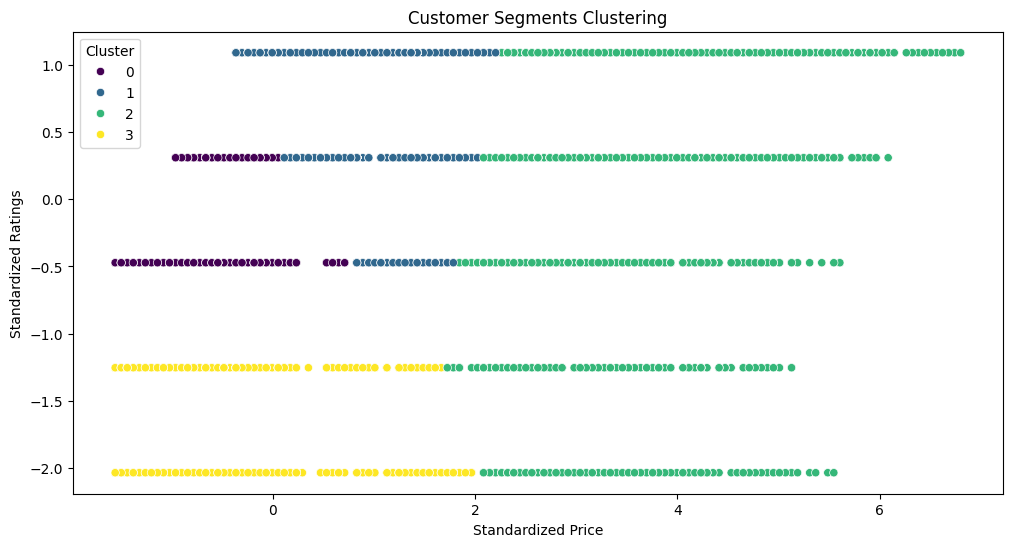

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = df[['Price (USD)', 'ratings']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segments Clustering')
plt.xlabel('Standardized Price')
plt.ylabel('Standardized Ratings')
plt.show()

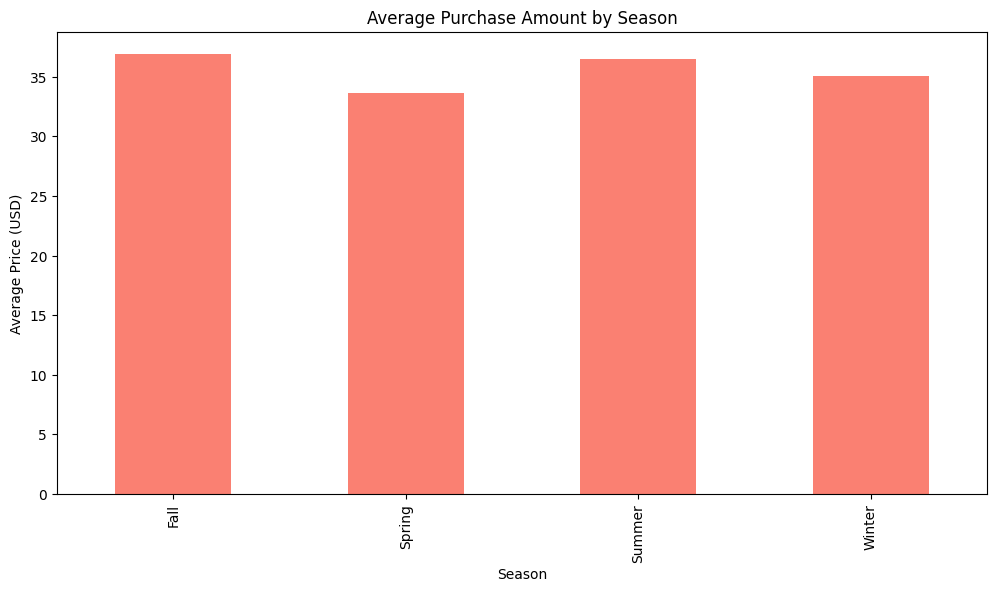

In [ ]:

seasonal_trends = df.groupby('season')['Price (USD)'].mean()
plt.figure(figsize=(12, 6))
seasonal_trends.plot(kind='bar', color='salmon')
plt.title('Average Purchase Amount by Season')
plt.xlabel('Season')
plt.ylabel('Average Price (USD)')
plt.show()

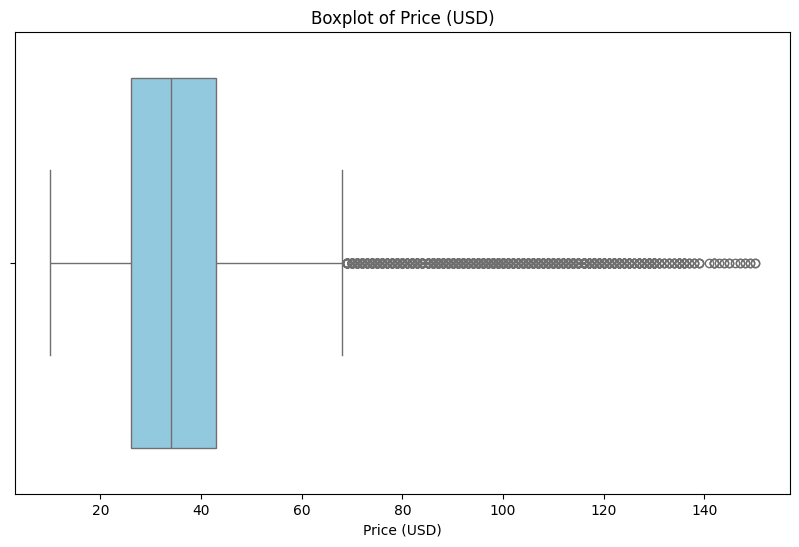

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price (USD)'], color='skyblue')
plt.title('Boxplot of Price (USD)')
plt.xlabel('Price (USD)')
plt.show()

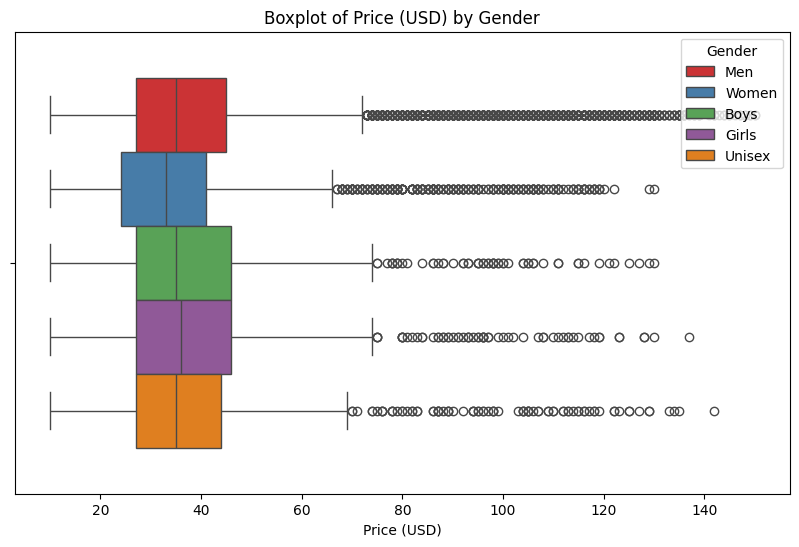

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Price (USD)', hue='gender', data=df, palette='Set1')
plt.title('Boxplot of Price (USD) by Gender')
plt.xlabel('Price (USD)')
plt.legend(title='Gender', loc='upper right')
plt.show()

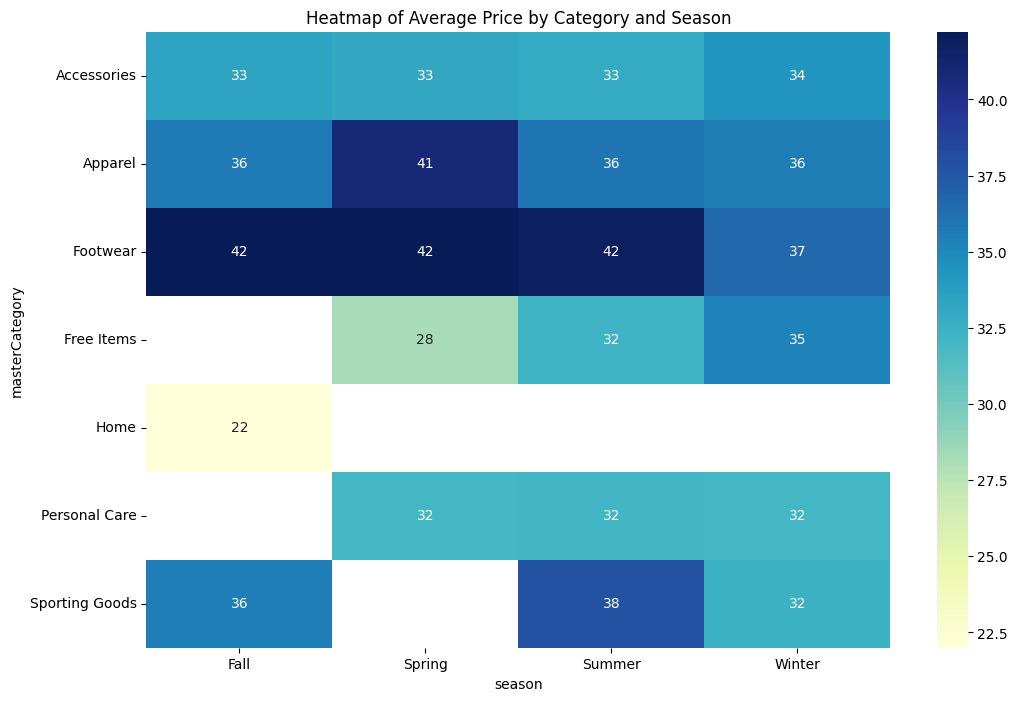

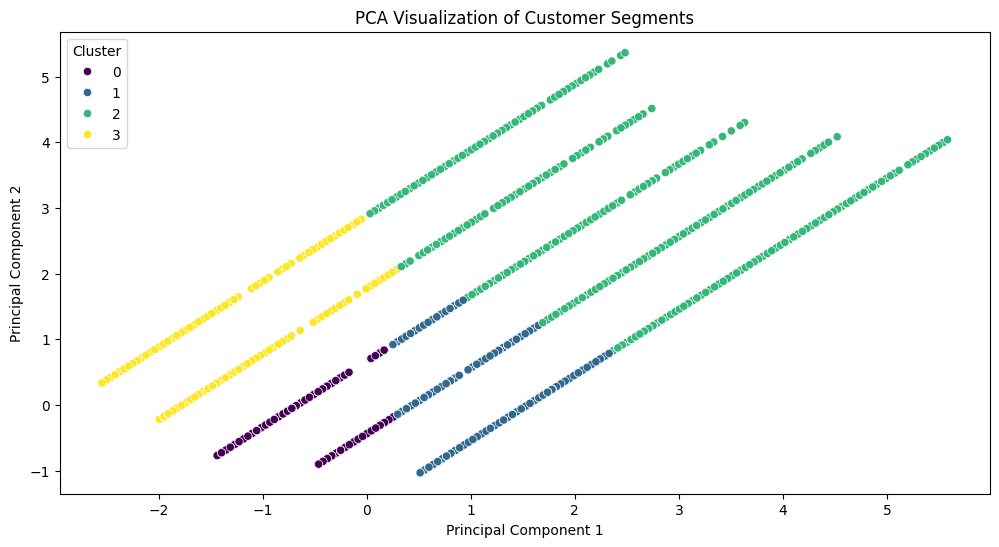

In [ ]:
from sklearn.decomposition import PCA

# Heatmap for category vs. season
pivot_table = df.pivot_table(index='masterCategory', columns='season', values='Price (USD)', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True)
plt.title('Heatmap of Average Price by Category and Season')
plt.show()

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('PCA Visualization of Customer Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Load the dataset
file_path = 'updated_dataset.csv'  # Update with your actual file path
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


          id gender masterCategory subCategory  articleType baseColour  \
0  15970.jpg    Men        Apparel     Topwear       Shirts  Navy Blue   
1  39386.jpg    Men        Apparel  Bottomwear        Jeans       Blue   
2  59263.jpg  Women    Accessories     Watches      Watches     Silver   
3  21379.jpg    Men        Apparel  Bottomwear  Track Pants      Black   
4  53759.jpg    Men        Apparel     Topwear      Tshirts       Grey   

   season    year   usage                             productDisplayName  \
0    Fall  2011.0  Casual               Turtle Check Men Navy Blue Shirt   
1  Summer  2012.0  Casual             Peter England Men Party Blue Jeans   
2  Winter  2016.0  Casual                       Titan Women Silver Watch   
3    Fall  2011.0  Casual  Manchester United Men Solid Black Track Pants   
4  Summer  2012.0  Casual                          Puma Men Grey T-shirt   

    filename                                               link  ratings  \
0  15970.jpg  http://a

In [ ]:
# Select relevant features for clustering
features = df[['Price (USD)', 'ratings']]  # You can add more features if needed

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [ ]:
# Determine the number of clusters (k)
k = 4  # You can adjust this based on your analysis
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model and predict clusters
df['Cluster'] = kmeans.fit_predict(scaled_features)


In [ ]:
def recommend_products(price, rating, season=None, category=None, color=None, gender=None, n_recommendations=5):
    # Scale the input features
    input_features = scaler.transform([[price, rating]])

    # Predict the cluster for the input
    cluster = kmeans.predict(input_features)[0]

    # Get products from the same cluster
    recommended_products = df[df['Cluster'] == cluster].copy()

    # Filter by optional parameters
    if season:
        recommended_products = recommended_products[recommended_products['season'] == season]
    if category:
        recommended_products = recommended_products[recommended_products['masterCategory'] == category]
    if color:
        recommended_products = recommended_products[recommended_products['baseColour'] == color]
    if gender:
        recommended_products = recommended_products[recommended_products['gender'] == gender]

    # Sort by Price (USD) or Ratings or any other criteria
    recommended_products = recommended_products.sort_values(by='Price (USD)', ascending=True)

    # Return the top n recommendations
    return recommended_products[['productDisplayName', 'Price (USD)', 'ratings']].head(n_recommendations)

# Example usage
price_input = 50  # Example input price
rating_input = 4.0  # Example input rating
season_input = "Summer"  # Example input season
category_input = "Clothing"  # Example input category
color_input = "Blue"  # Example input color
gender_input = "Women"  # Example input gender

recommendations = recommend_products(price_input, rating_input, season=season_input, category=category_input, color=color_input, gender=gender_input)
print("Recommended Products:")
print(recommendations)



Recommended Products:
Empty DataFrame
Columns: [productDisplayName, Price (USD), ratings]
Index: []


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Display unique values for the fields used in filtering
print("Unique seasons:", df['season'].unique())
print("Unique master categories:", df['masterCategory'].unique())
print("Unique colors:", df['baseColour'].unique())
print("Unique genders:", df['gender'].unique())
# Example usage with verified inputs
price_input = 50  # Example input price (adjust based on data)
rating_input = 4.0  # Example input rating (adjust based on data)
season_input = "Summer"  # Example input season (check actual unique values)
category_input = "Clothing"  # Example input category (check actual unique values)
color_input = "Blue"  # Example input color (check actual unique values)
gender_input = "Women"  # Example input gender (check actual unique values)

recommendations = recommend_products(price_input, rating_input, season=season_input, category=category_input, color=color_input, gender=gender_input)
print("Recommended Products:")
print(recommendations)


Unique seasons: ['Fall' 'Summer' 'Winter' 'Spring' nan]
Unique master categories: ['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']
Unique colors: ['Navy Blue' 'Blue' 'Silver' 'Black' 'Grey' 'Green' 'Purple' 'White'
 'Beige' 'Brown' 'Bronze' 'Teal' 'Copper' 'Pink' 'Off White' 'Maroon'
 'Red' 'Khaki' 'Orange' 'Coffee Brown' 'Yellow' 'Charcoal' 'Gold' 'Steel'
 'Tan' 'Multi' 'Magenta' 'Lavender' 'Sea Green' 'Cream' 'Peach' 'Olive'
 'Skin' 'Burgundy' 'Grey Melange' 'Rust' 'Rose' 'Lime Green' 'Mauve'
 'Turquoise Blue' 'Metallic' 'Mustard' 'Taupe' 'Nude' 'Mushroom Brown' nan
 'Fluorescent Green']
Unique genders: ['Men' 'Women' 'Boys' 'Girls' 'Unisex']
Recommended Products:
Empty DataFrame
Columns: [productDisplayName, Price (USD), ratings]
Index: []


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Check for missing values in relevant columns
print("Missing values in relevant columns:")
print(df[['season', 'masterCategory', 'baseColour', 'gender']].isnull().sum())


Missing values in relevant columns:
season            21
masterCategory     0
baseColour        15
gender             0
dtype: int64


In [ ]:
# Simplified example usage
recommendations = recommend_products(price_input, rating_input)  # Only using price and rating
print("Recommended Products:")
print(recommendations)


Recommended Products:
                                      productDisplayName  Price (USD)  ratings
30164                    Lino Perros Women Olive Handbag           30        5
37356                        ToniQ Women Silver Earrings           30        5
37317                  Nirvana Men's Wings Brown T-shirt           30        5
3756   Lakme 9 to 5 Flawless Makeup Pearl Foundation ...           30        5
37219               Proline Men Olive Brown Polo T-shirt           30        5


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd

# Load the dataset
file_path = 'updated_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD)
0,15970.jpg,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"High quality fabric, very satisfied. for every...",February,37
1,39386.jpg,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Exceeded expectations, love the fit! and I'm v...",October,104
2,59263.jpg,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy. Would rec...",September,32
3,21379.jpg,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"High quality fabric, very satisfied. for casua...",May,41
4,53759.jpg,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,http://assets.myntassets.com/v1/images/style/p...,2,"Poor material, doesn't last long. for special ...",January,11


id,10002.jpg,10008.jpg,10016.jpg,10017.jpg,10029.jpg,10030.jpg,10059.jpg,10079.jpg,10092.jpg,10099.jpg,...,9868.jpg,9885.jpg,9913.jpg,9914.jpg,9932.jpg,9945.jpg,9966.jpg,9983.jpg,9988.jpg,9991.jpg
id,,,,,,,,,,,,,,,,,,,,,
10002.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10008.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10016.jpg,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10017.jpg,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10029.jpg,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Display the list of columns in the DataFrame
print("Columns in the dataset:")
print(df.columns)

# Check for missing values in the actual columns
print("\nMissing values in each column:")
print(df.isnull().sum())
# Fill missing values for 'baseColour' with the most frequent value
df.loc[:, 'baseColour'] = df['baseColour'].fillna(df['baseColour'].mode()[0])

# Fill missing values for 'season' with the most frequent value
df.loc[:, 'season'] = df['season'].fillna(df['season'].mode()[0])

# Fill missing value for 'year' with the median value (since it's a numerical field)
df.loc[:, 'year'] = df['year'].fillna(df['year'].median())

# Fill missing values for 'usage' with 'Not Specified'
df.loc[:, 'usage'] = df['usage'].fillna('Not Specified')

# Fill missing values for 'productDisplayName' with 'Unknown'
df.loc[:, 'productDisplayName'] = df['productDisplayName'].fillna('Unknown')

# Verify that all missing values have been handled
print("\nMissing values after filling:")
print(df.isnull().sum())


Columns in the dataset:
Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName',
       'filename', 'link', 'ratings', 'review', 'Month', 'Price (USD)'],
      dtype='object')

Missing values in each column:
id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
filename                0
link                    0
ratings                 0
review                  0
Month                   0
Price (USD)             0
dtype: int64

Missing values after filling:
id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename